In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
import plotly.express as px
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx

## Load and Inspect Data

In [2]:
#load dataset
data = pd.read_csv('retail_data.csv')

In [3]:
data.head(5)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [5]:
data.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,3.016770e+05,301702.000000,3.016480e+05,301670.000000,301837.000000,301660.000000,301649.000000,301653.000000,301660.000000,301826.000000
mean,5.495823e+06,55006.553934,5.501464e+09,50298.951019,35.481326,2023.165113,5.359729,255.163659,1367.651156,3.162670
std,2.595565e+06,26005.675200,2.596017e+09,28972.807134,15.021933,0.371283,2.868575,141.389640,1128.998515,1.320827
min,1.000007e+06,10000.000000,1.000049e+09,501.000000,18.000000,2023.000000,1.000000,10.000219,10.003750,1.000000
25%,3.247930e+06,32469.250000,3.255061e+09,25425.000000,22.000000,2023.000000,3.000000,132.890764,438.724278,2.000000
50%,5.499657e+06,55012.000000,5.505812e+09,50602.500000,32.000000,2023.000000,5.000000,255.470969,1041.117547,3.000000
75%,7.739509e+06,77511.000000,7.749860e+09,75252.000000,46.000000,2023.000000,8.000000,377.672606,2029.999853,4.000000
max,9.999995e+06,99999.000000,9.999996e+09,99949.000000,70.000000,2024.000000,10.000000,499.997911,4999.625796,5.000000


In [6]:
data.shape

(302010, 30)

#Data Preprocessing

###Handle Missing Values

In [7]:
## Check for missing values
data.isnull().sum()

,0
Transaction_ID,333
Customer_ID,308
Name,382
Email,347
Phone,362
Address,315
City,248
State,281
Zipcode,340
Country,271


In [8]:
# Remove missing values
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

,0
Transaction_ID,0
Customer_ID,0
Name,0
Email,0
Phone,0
Address,0
City,0
State,0
Zipcode,0
Country,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293911 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    293911 non-null  float64
 1   Customer_ID       293911 non-null  float64
 2   Name              293911 non-null  object 
 3   Email             293911 non-null  object 
 4   Phone             293911 non-null  float64
 5   Address           293911 non-null  object 
 6   City              293911 non-null  object 
 7   State             293911 non-null  object 
 8   Zipcode           293911 non-null  float64
 9   Country           293911 non-null  object 
 10  Age               293911 non-null  float64
 11  Gender            293911 non-null  object 
 12  Income            293911 non-null  object 
 13  Customer_Segment  293911 non-null  object 
 14  Date              293911 non-null  object 
 15  Year              293911 non-null  float64
 16  Month             293911 

###Standardise Column Names

In [11]:
#Convert all column names to lowercase
data.columns = data.columns.str.lower()

In [12]:
data.columns.values

array(['transaction_id', 'customer_id', 'name', 'email', 'phone',
       'address', 'city', 'state', 'zipcode', 'country', 'age', 'gender',
       'income', 'customer_segment', 'date', 'year', 'month', 'time',
       'total_purchases', 'amount', 'total_amount', 'product_category',
       'product_brand', 'product_type', 'feedback', 'shipping_method',
       'payment_method', 'order_status', 'ratings', 'products'],
      dtype=object)

###Convert Data Types

In [13]:
# Convert specified columns to 64-bit integer type for consistent numeric processing
data['transaction_id'] = data['transaction_id'].astype('int64')
data['customer_id'] = data['customer_id'].astype('int64')
data['phone'] = data['phone'].astype('int64')
data['age'] = data['age'].astype('int64')
data['ratings'] = data['ratings'].astype('int64')
data['total_purchases'] = data['total_purchases'].astype('int64')
data['year'] = data['year'].astype('int64')

In [14]:
data.dtypes

,0
transaction_id,int64
customer_id,int64
name,object
email,object
phone,int64
address,object
city,object
state,object
zipcode,float64
country,object


In [15]:
# Converting date format
def convert_date(x):
  date_dash = pd.to_datetime(x, format='%m-%d-%y', errors = 'coerce')
  date_slash = pd.to_datetime(x, format='%m/%d/%Y', errors = 'coerce')
  return date_dash.fillna(date_slash)
data['date'] = convert_date(data['date'])

In [16]:
data['date'].head(5)

,date
0,2023-09-18
1,2023-12-31
2,2023-04-26
3,2023-05-08
4,2024-01-10


In [17]:
# Combine 'date' and 'time' columns into a single datetime object in a new 'datetime' column
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['datetime'] = pd.to_datetime(data['date'].astype('string') + ' ' + data['time'].astype('string'))

###Remove Duplicate Records

In [18]:
# Check duplicate customer
duplicated_customer = data.duplicated('customer_id').sum()
print(" ", duplicated_customer)

  207426


In [19]:
# Found different customers with the same 'customer_id'
data[data['customer_id'].duplicated(keep=False)].sort_values(by='customer_id').head(4).T

,290160,231852,145221,297459
transaction_id,4759669,8180050,4340470,8901617
customer_id,10000,10000,10000,10000
name,Robert Cook,John Patterson,Thomas Thompson,Teresa Cole
email,Caroline60@gmail.com,Victoria5@gmail.com,Christy6@gmail.com,Molly61@gmail.com
phone,8428883216,6855934982,6640432656,3057277425
address,232 Lawrence Greens,136 Perkins Street,719 Kevin Route,14721 Robert Glen Apt. 663
city,San Antonio,Phoenix,San Francisco,Hamburg
state,Nevada,North Carolina,Maine,Berlin
zipcode,89220.0,28468.0,87288.0,56734.0
country,USA,USA,USA,Germany


In [20]:
# Generated a 'new_customer_id' to find duplicate customers
data['unique_customer'] = data[['name', 'country', 'gender']].agg('-'.join, axis=1)
data['new_customer_id'] = pd.factorize(data['unique_customer'])[0]

In [21]:
data.head(5)

,transaction_id,customer_id,name,email,phone,address,city,state,zipcode,country,...,product_type,feedback,shipping_method,payment_method,order_status,ratings,products,datetime,unique_customer,new_customer_id
0,8691788,37249,Michelle Harrington,Ebony39@gmail.com,1414786801,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,Shorts,Excellent,Same-Day,Debit Card,Shipped,5,Cycling shorts,2023-09-18 22:03:55,Michelle Harrington-Germany-Male,0
1,2174773,69749,Kelsey Hill,Mark36@gmail.com,6852899987,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,Tablet,Excellent,Standard,Credit Card,Processing,4,Lenovo Tab,2023-12-31 08:42:04,Kelsey Hill-UK-Female,1
2,6679610,30192,Scott Jensen,Shane85@gmail.com,8362160449,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,Children's,Average,Same-Day,Credit Card,Processing,2,Sports equipment,2023-04-26 04:06:29,Scott Jensen-Australia-Male,2
3,7232460,62101,Joseph Miller,Mary34@gmail.com,2776751724,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,Tools,Excellent,Standard,PayPal,Processing,4,Utility knife,2023-05-08 14:55:17,Joseph Miller-Canada-Male,3
4,4983775,27901,Debra Coleman,Charles30@gmail.com,9098267635,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,Chocolate,Bad,Standard,Cash,Shipped,1,Chocolate cookies,2024-01-10 16:54:07,Debra Coleman-UK-Male,4


In [22]:
duplicated_customer = data.duplicated('new_customer_id').sum()
print(" ", duplicated_customer)

  45184


In [23]:
data[data['new_customer_id'].duplicated(keep=False)].sort_values(by='new_customer_id').head(4).T

,3,93884,197288,60266
transaction_id,7232460,9066724,8889078,6623885
customer_id,62101,49294,63923,18016
name,Joseph Miller,Joseph Miller,Joseph Miller,Joseph Miller
email,Mary34@gmail.com,Kimberly37@gmail.com,Kristen75@gmail.com,Brandon30@gmail.com
phone,2776751724,7317527262,7760159966,3804067044
address,8148 Thomas Creek Suite 100,1461 Stewart Cliff Apt. 834,27155 Ryan Cliff,83928 Glenn Light
city,Edmonton,Regina,Calgary,Hamilton
state,Ontario,Ontario,Ontario,Ontario
zipcode,88420.0,27664.0,6473.0,25116.0
country,Canada,Canada,Canada,Canada


In [24]:
# Check duplicates as per 'transaction_id'
duplicated_transaction = data.duplicated('transaction_id').sum()
print(" ", duplicated_transaction)

  6906


In [25]:
data[data['transaction_id'].duplicated(keep=False)].sort_values(by='transaction_id').head(4).T

,91025,256845,301783,165944
transaction_id,1003092,1003092,1005039,1005039
customer_id,27378,97124,84239,84239
name,Nicholas Moore,Yolanda Blankenship,John Tate,John Tate
email,Danielle79@gmail.com,Kristine9@gmail.com,Andrea27@gmail.com,Andrea27@gmail.com
phone,6988330857,2360380301,9064050806,9064050806
address,5564 Daniel Garden Apt. 073,0933 Yolanda Island,7563 Pittman Tunnel,7563 Pittman Tunnel
city,Chicago,St. John's,Bonn,Bonn
state,Connecticut,Ontario,Berlin,Berlin
zipcode,6790.0,9692.0,35327.0,35327.0
country,USA,Canada,Germany,Germany


In [26]:
# Create 'new_transaction_id' to find duplicate
data['unique_transaction'] = data[['unique_customer', 'datetime', 'amount']].astype('string').agg('-'.join, axis=1)
data['new_transaction_id'] = pd.factorize(data['unique_transaction'])[0]

In [27]:
num_duplicate = data.duplicated('new_transaction_id').sum()
print(" ", num_duplicate)

  1830


In [28]:
data[data['new_transaction_id'].duplicated(keep=False)].sort_values(by='new_transaction_id').head(4).T


,301970,1617,1993,301213
transaction_id,6236672,6236672,5672164,5672164
customer_id,13491,13491,74336,74336
name,Mary Fuller,Mary Fuller,Willie Gomez,Willie Gomez
email,Stephanie26@gmail.com,Stephanie26@gmail.com,Anthony16@gmail.com,Anthony16@gmail.com
phone,5775575359,5775575359,5676905773,5676905773
address,91987 Jones Hills Apt. 648,91987 Jones Hills Apt. 648,0162 Ortiz Greens Suite 331,0162 Ortiz Greens Suite 331
city,Hull,Portsmouth,Portsmouth,Southampton
state,England,England,England,England
zipcode,62223.0,62223.0,30257.0,30257.0
country,UK,UK,UK,UK


In [29]:
# Remove duplicates
data = data.drop_duplicates(subset='new_transaction_id')

In [30]:
duplicate_count = data.duplicated().sum()
print(duplicate_count)

0


In [31]:
# Drop specified columns from the DataFrame
data.drop(['transaction_id','customer_id','date','time',
           'unique_customer','unique_transaction', 'total_purchases'],axis = 1, inplace = True)

In [32]:
data.head(5)

,name,email,phone,address,city,state,zipcode,country,age,gender,...,product_type,feedback,shipping_method,payment_method,order_status,ratings,products,datetime,new_customer_id,new_transaction_id
0,Michelle Harrington,Ebony39@gmail.com,1414786801,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21,Male,...,Shorts,Excellent,Same-Day,Debit Card,Shipped,5,Cycling shorts,2023-09-18 22:03:55,0,0
1,Kelsey Hill,Mark36@gmail.com,6852899987,82072 Dawn Centers,Nottingham,England,99071.0,UK,19,Female,...,Tablet,Excellent,Standard,Credit Card,Processing,4,Lenovo Tab,2023-12-31 08:42:04,1,1
2,Scott Jensen,Shane85@gmail.com,8362160449,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48,Male,...,Children's,Average,Same-Day,Credit Card,Processing,2,Sports equipment,2023-04-26 04:06:29,2,2
3,Joseph Miller,Mary34@gmail.com,2776751724,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,56,Male,...,Tools,Excellent,Standard,PayPal,Processing,4,Utility knife,2023-05-08 14:55:17,3,3
4,Debra Coleman,Charles30@gmail.com,9098267635,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,22,Male,...,Chocolate,Bad,Standard,Cash,Shipped,1,Chocolate cookies,2024-01-10 16:54:07,4,4


In [33]:
data.shape

(292081, 28)

In [34]:
data.columns.values

array(['name', 'email', 'phone', 'address', 'city', 'state', 'zipcode',
       'country', 'age', 'gender', 'income', 'customer_segment', 'year',
       'month', 'amount', 'total_amount', 'product_category',
       'product_brand', 'product_type', 'feedback', 'shipping_method',
       'payment_method', 'order_status', 'ratings', 'products',
       'datetime', 'new_customer_id', 'new_transaction_id'], dtype=object)

###Outlier Detection

In [35]:
# Detect outliers in numeric features using the IQR method
numeric_features = data.select_dtypes(include='number').columns.drop(['new_customer_id', 'new_transaction_id'])
for i, feature in enumerate(numeric_features):
  q1 = data[feature].quantile(0.25)
  q3 = data[feature].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  Outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
  print(f'Outliers in {feature}:\n', len(Outliers))
plt.show()

Outliers in phone:
 0
Outliers in zipcode:
 0
Outliers in age:
 0
Outliers in year:
 48225
Outliers in month:
 0
Outliers in amount:
 0
Outliers in total_amount:
 3786
Outliers in ratings:
 0


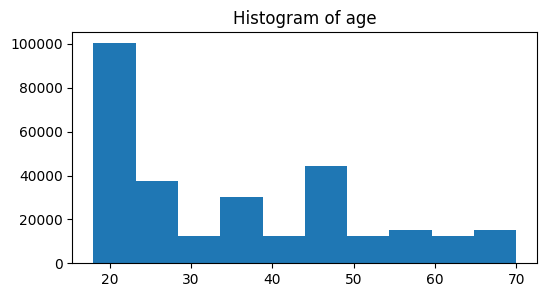

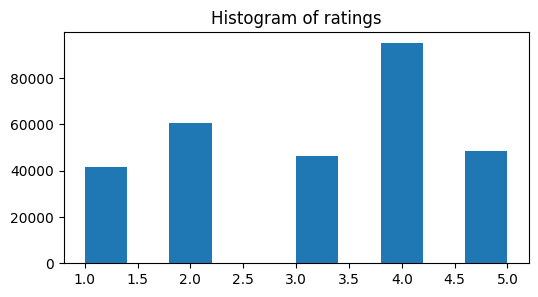

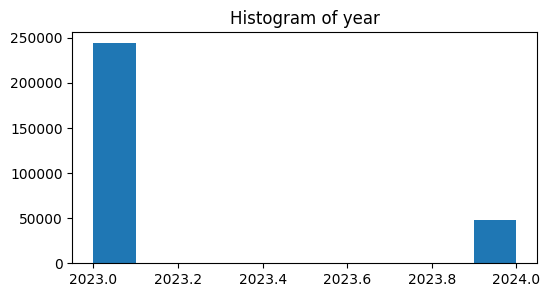

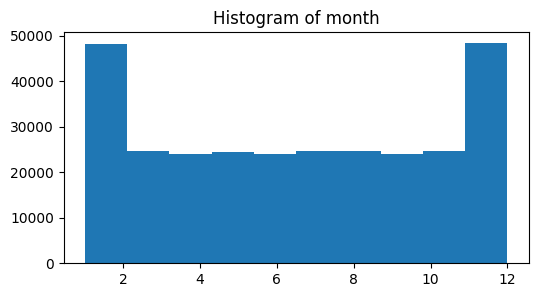

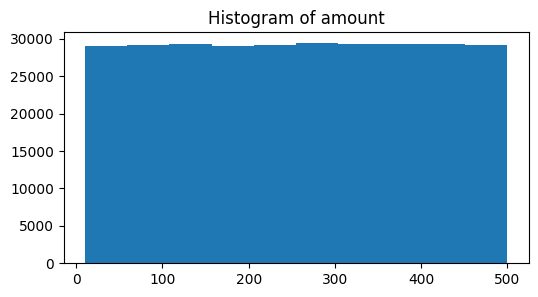

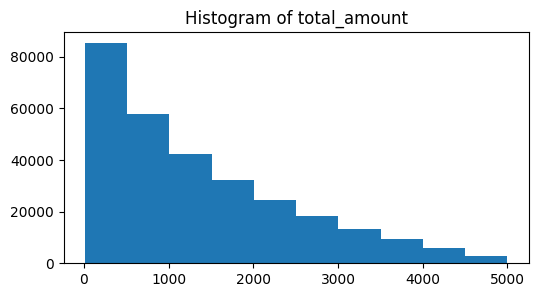

In [36]:
# Plot histograms of columns to visualize
cloumns = ['age', 'ratings', 'year', 'month', 'amount', 'total_amount']
for col in cloumns:
  plt.figure(figsize=(6, 3))
  plt.hist(data[col])
  plt.title(f'Histogram of {col}')
  plt.show()

In [37]:
data.drop(['total_amount'], inplace=True, axis=1)

###Data Consistency Check

In [38]:
# Get the number of unique values in each categorical column
categorical_features = data.select_dtypes(include='object').columns
for col in categorical_features:
  unique_values = data[col].unique()
  print(f'Unique values in {col}:\n', len(unique_values))

Unique values in name:
 156638
Unique values in email:
 52530
Unique values in address:
 291610
Unique values in city:
 130
Unique values in state:
 54
Unique values in country:
 5
Unique values in gender:
 2
Unique values in income:
 3
Unique values in customer_segment:
 3
Unique values in product_category:
 5
Unique values in product_brand:
 18
Unique values in product_type:
 33
Unique values in feedback:
 4
Unique values in shipping_method:
 3
Unique values in payment_method:
 4
Unique values in order_status:
 4
Unique values in products:
 318


#Statistical Analysis and Visualization

###Descriptive Analysis

In [39]:
# Generate summary statistics for all numeric columns
data.select_dtypes(include='number').describe().round(2)

,phone,zipcode,age,year,month,amount,ratings,new_customer_id,new_transaction_id
count,2.920810e+05,292081.00,292081.00,292081.00,292081.00,292081.00,292081.00,292081.00,292081.00
mean,5.500024e+09,50290.45,35.41,2023.17,6.50,255.18,3.16,116689.99,146040.00
std,2.595980e+09,28978.26,15.00,0.37,3.45,141.39,1.32,71853.31,84316.67
min,1.000049e+09,501.00,18.00,2023.00,1.00,10.00,1.00,0.00,0.00
25%,3.253232e+09,25413.00,22.00,2023.00,4.00,132.88,2.00,53795.00,73020.00
50%,5.503426e+09,50586.00,32.00,2023.00,7.00,255.48,3.00,112566.00,146040.00
75%,7.749024e+09,75266.00,46.00,2023.00,10.00,377.70,4.00,178081.00,219060.00
max,9.999996e+09,99949.00,70.00,2024.00,12.00,500.00,5.00,248726.00,292080.00


In [40]:
data[['age','amount', 'ratings']].describe().round(2)

,age,amount,ratings
count,292081.00,292081.00,292081.00
mean,35.41,255.18,3.16
std,15.00,141.39,1.32
min,18.00,10.00,1.00
25%,22.00,132.88,2.00
50%,32.00,255.48,3.00
75%,46.00,377.70,4.00
max,70.00,500.00,5.00


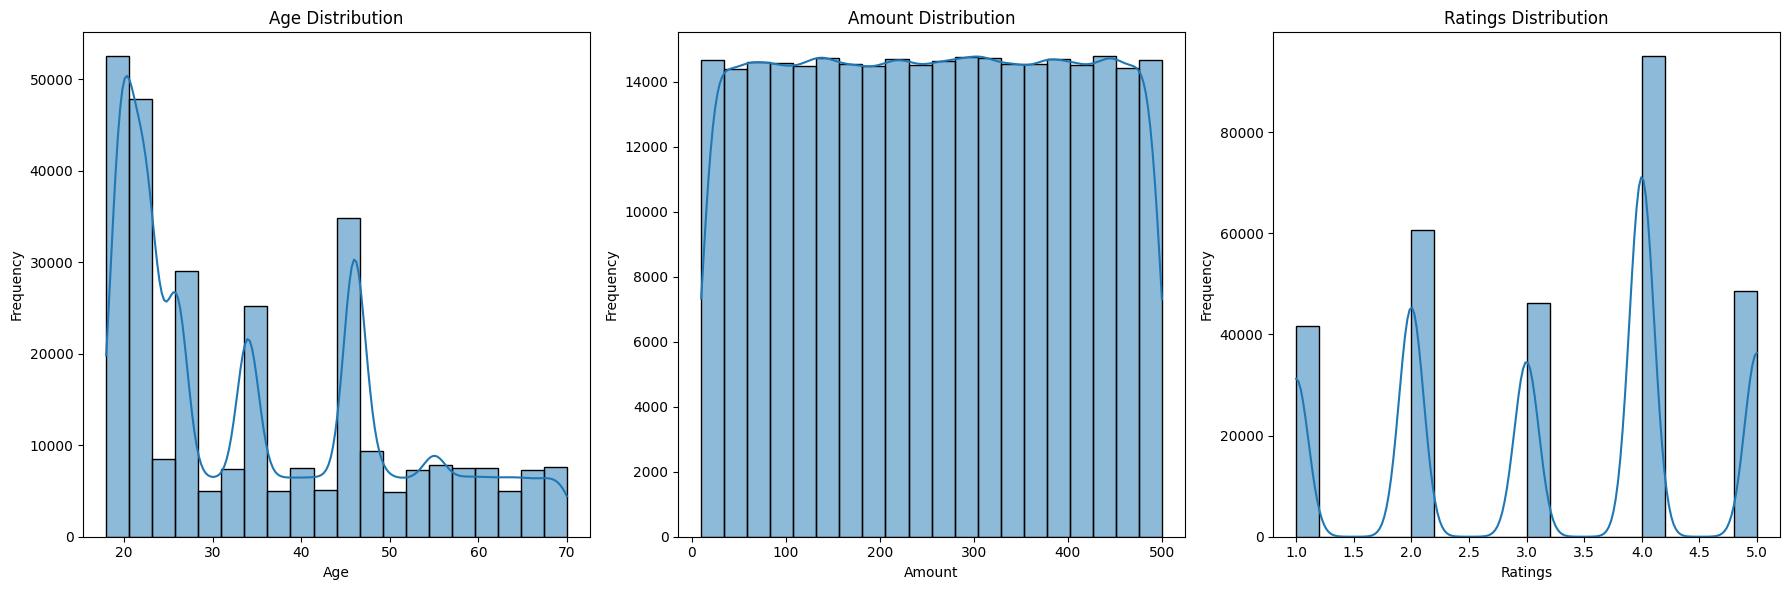

In [41]:
# Plot a histogram for each numeric column
num_cols = ['age', 'amount', 'ratings']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, col in zip(axes.flatten(), num_cols):
    sns.histplot(data[col], kde=True, bins=20, ax=ax)
    ax.set_title(f'{col.capitalize()} Distribution')
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Frequency')

plt.tight_layout() # Adjust subplot spacing
plt.show()

In [42]:
# Taking a long time to run (more calculations)
'''
sns.histplot(data=data, x='age', hue='amount', kde=True, element='step')
plt.title('Amount Distribution by Age')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()
'''

"\nsns.histplot(data=data, x='age', hue='amount', kde=True, element='step')\nplt.title('Amount Distribution by Age')\nplt.xlabel('Amount')\nplt.ylabel('Frequency')\nplt.show()\n"

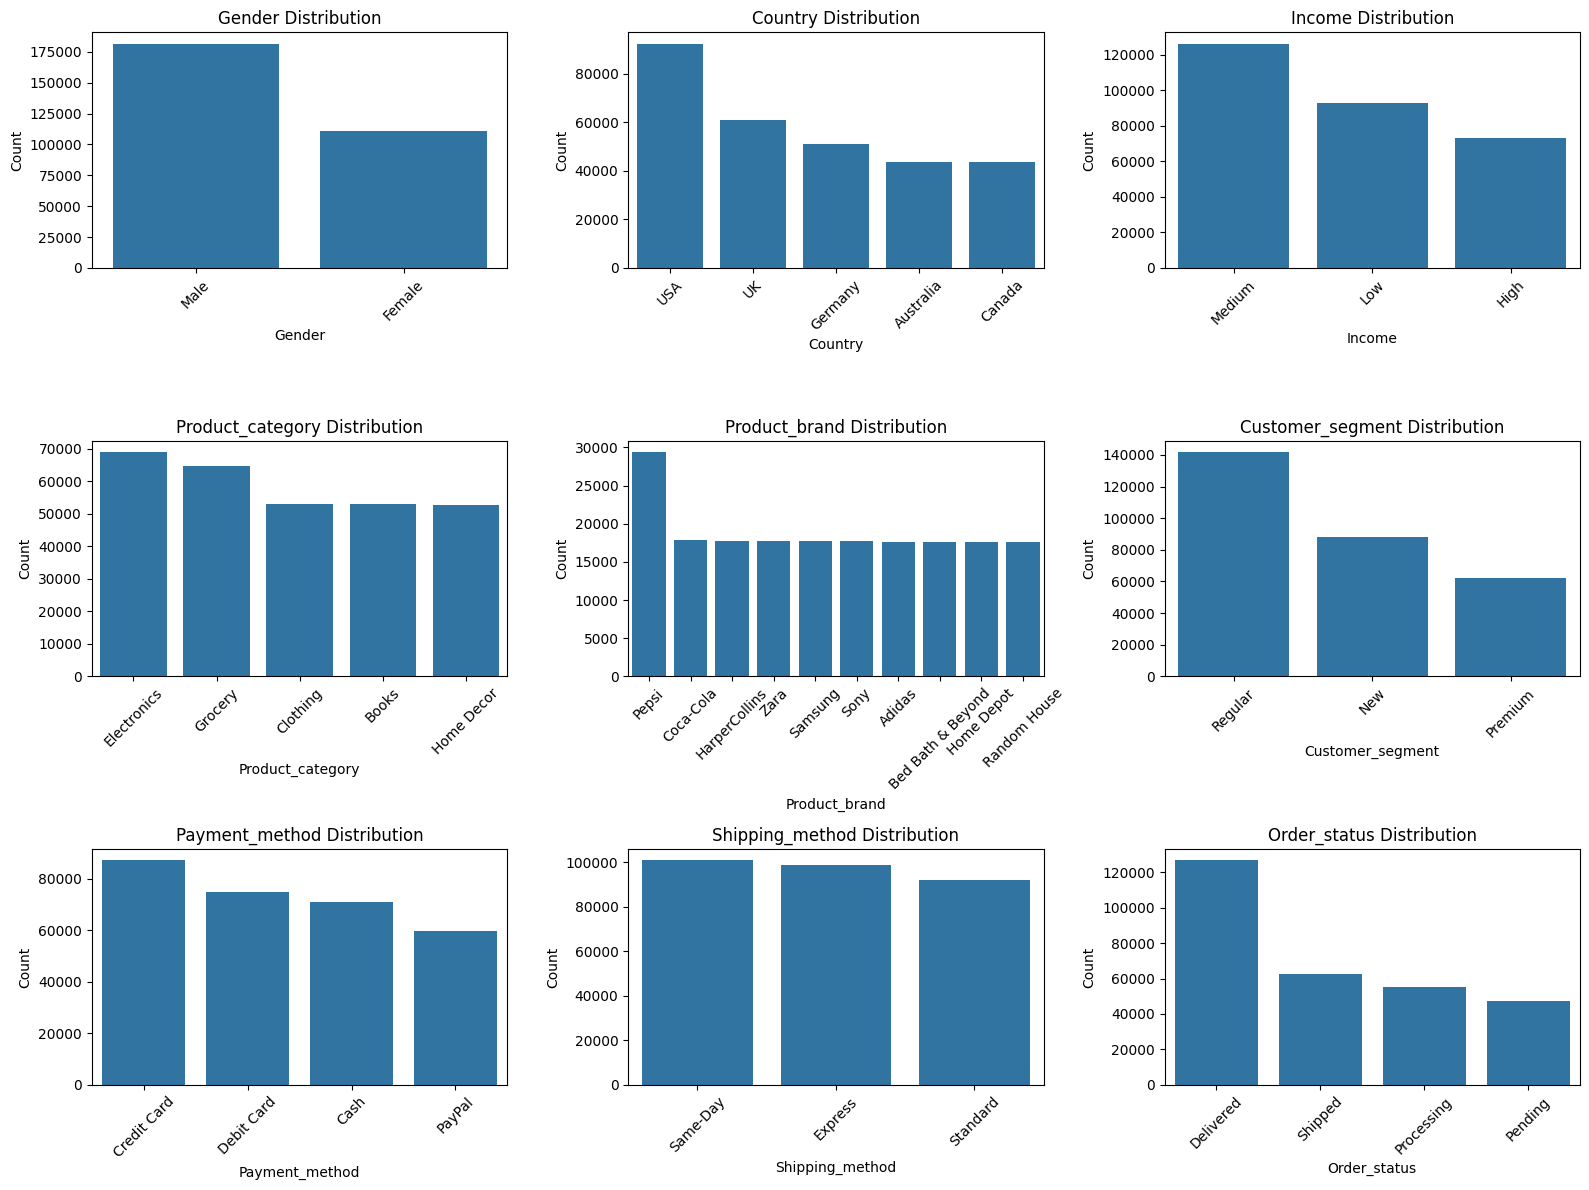

In [43]:
# Plot a histogram for each categorical column
categorical_cols = ['gender', 'country', 'income',
                    'product_category', 'product_brand', 'customer_segment',
                    'payment_method', 'shipping_method', 'order_status']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

for ax, col in zip(axes.flatten(), categorical_cols):
    sns.countplot(data=data, x=col, ax=ax, order=data[col].value_counts().index[:10])
    ax.set_title(f'{col.capitalize()} Distribution')
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout() # Adjust subplot spacing
plt.show()

In [44]:
# Calculate total revenue grouped by order status
order_revenue = data.groupby('order_status')['amount'].sum()

# Revenue from completed (Delivered) orders
completed = order_revenue.get('Delivered', 0)

# Revenue from all other (not completed) orders
not_completed = order_revenue.drop('Delivered', errors='ignore').sum()

# Difference in revenue between not completed and completed orders
difference = not_completed - completed

print(f"Completed Orders Revenue: ${completed / 1_000_000:.2f} million")
print(f"Not Completed Orders Revenue: ${not_completed / 1_000_000:.2f} million")
print(f"Difference (Not Completed - Completed): ${difference / 1_000_000:.2f} million")

# Identify order statuses with less revenue than 'Delivered', excluding 'Delivered' itself
losses = order_revenue[order_revenue < completed].drop('Delivered', errors='ignore')

if not losses.empty:
    print("\nOrder statuses with less revenue than 'Delivered':")
    for status, revenue in losses.items():
        print(f"- {status}: ${revenue / 1_000_000:.2f} million")
else:
    print("\nAll non-delivered statuses earned equal or more than 'Delivered'.")

Completed Orders Revenue: $32.30 million
Not Completed Orders Revenue: $42.23 million
Difference (Not Completed - Completed): $9.93 million

Order statuses with less revenue than 'Delivered':
- Pending: $12.09 million
- Processing: $14.06 million
- Shipped: $16.07 million


###Inferential Analysis

In [45]:
# Sum of 'amount' spent by each customer on completed ('Delivered') orders
completed = data[data['order_status'] == 'Delivered'].groupby('new_customer_id')['amount'].sum().rename('completed')

# Sum of 'amount' spent by each customer on not completed orders
not_completed = data[data['order_status'] != 'Delivered'].groupby('new_customer_id')['amount'].sum().rename('not_completed')

# Combine completed and not completed spending into a single DataFrame
customer_spend = pd.concat([completed, not_completed], axis=1).fillna(0)

# Perform Welch’s t-test to compare spending between completed and not completed orders
t_stat, p_val = ttest_ind(customer_spend['completed'], customer_spend['not_completed'], equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Statistically significant difference in spending between completed and not completed orders.")
else:
    print("No significant difference in spending between completed and not completed orders.")

T-statistic: -72.859
P-value: 0.0000
Statistically significant difference in spending between completed and not completed orders.


In [46]:
# Step 1: Pivot the data to get total 'Amount' per customer per 'Order_Status'
order_status_summary = (
    data.groupby(['new_customer_id', 'order_status'])['amount']
    .sum()
    .unstack(fill_value=0)
)

# Step 2: Perform ANOVA using available statuses (handling missing ones safely)
statuses = ['Shipped', 'Processing', 'Pending', 'Delivered']
valid_columns = [col for col in statuses]

f_stat, p_val = f_oneway(*(order_status_summary[col] for col in valid_columns))

# Step 3: Print results
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.4f}")

# Step 4: Interpret
if p_val < 0.05:
    print("Significant differences in spending across order statuses.")
else:
    print("No significant differences in spending across order statuses.")

F-statistic: 16152.046
P-value: 0.0000
Significant differences in spending across order statuses.


In [47]:
# Reshape summary DataFrame from wide to long format for Tukey HSD test
melted_data = order_status_summary.reset_index().melt(
    id_vars='new_customer_id',
    var_name='order_status',
    value_name='Amount_Spent'
)

# Clean up 'order_status' names by removing '_amount' suffix
melted_data['order_status'] = melted_data['order_status'].str.replace('_amount', '', regex=False)

# Perform Tukey's HSD post-hoc test for pairwise comparisons between order statuses
tukey_result = pairwise_tukeyhsd(
    endog=melted_data['Amount_Spent'],
    groups=melted_data['order_status'],
    alpha=0.05
)

print(tukey_result)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj  lower    upper   reject
-------------------------------------------------------------
 Delivered    Pending -81.2548   0.0 -82.3188 -80.1908   True
 Delivered Processing -73.3339   0.0 -74.3979   -72.27   True
 Delivered    Shipped -65.2621   0.0 -66.3261 -64.1981   True
   Pending Processing   7.9209   0.0   6.8569   8.9848   True
   Pending    Shipped  15.9927   0.0  14.9287  17.0567   True
Processing    Shipped   8.0718   0.0   7.0078   9.1358   True
-------------------------------------------------------------


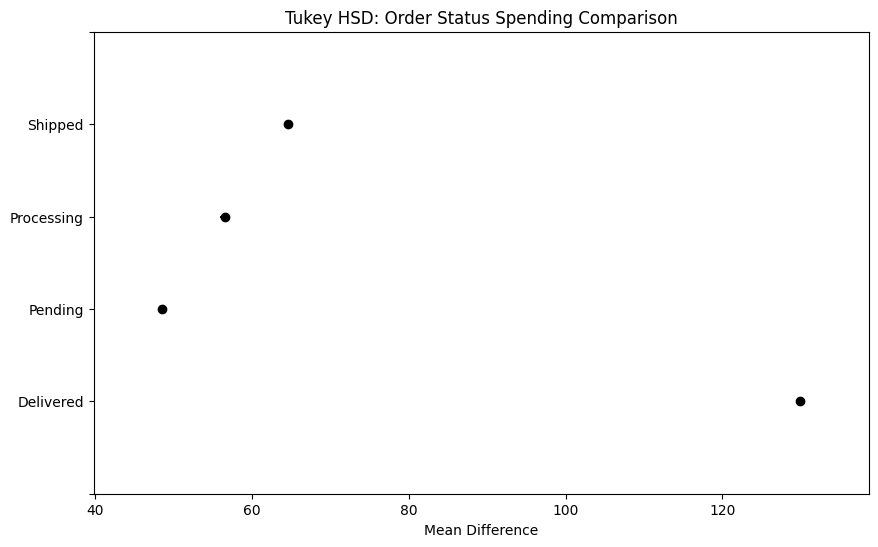

In [48]:
# Plot simultaneous confidence intervals from Tukey HSD test results
tukey_result.plot_simultaneous()
plt.title("Tukey HSD: Order Status Spending Comparison")
plt.xlabel("Mean Difference")
plt.show()

In [49]:
# Create a contingency table
contingency = pd.crosstab(data['shipping_method'], data['order_status'])

# Run Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

if p < 0.05:
    print("\nSignificant association between Shipping Method and Order Status.")
else:
    print("\nNo significant association between Shipping Method and Order Status.")

Chi-square Statistic: 114.70
P-value: 0.0000
Degrees of Freedom: 6

Significant association between Shipping Method and Order Status.


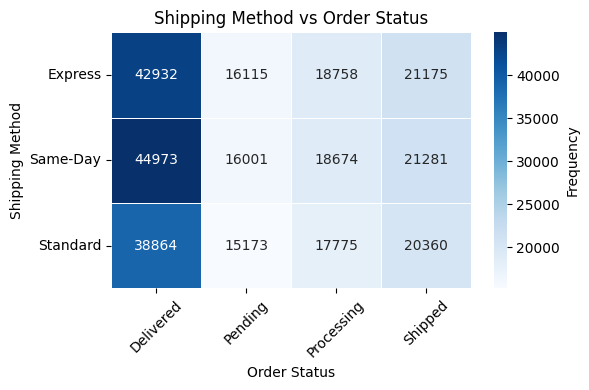

In [50]:
plt.figure(figsize=(6, 4))

# Plot heatmap of contingency table with annotations and customized styling
sns.heatmap(contingency, annot=True, cmap="Blues", fmt="d", linewidths=0.5, cbar_kws={'label': 'Frequency'}, annot_kws={"size": 10})

plt.title('Shipping Method vs Order Status')
plt.xlabel('Order Status')
plt.ylabel('Shipping Method')

# Rotate x-axis labels for better readability, keep y-axis labels horizontal
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [51]:
# Create a contingency table
contingency = pd.crosstab(data['payment_method'], data['order_status'])

# Run Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

if p < 0.05:
    print("\nSignificant association between Payment Method and Order Status.")
else:
    print("\nNo significant association between Payment Method and Order Status.")

Chi-square Statistic: 325.82
P-value: 0.0000
Degrees of Freedom: 9

Significant association between Payment Method and Order Status.


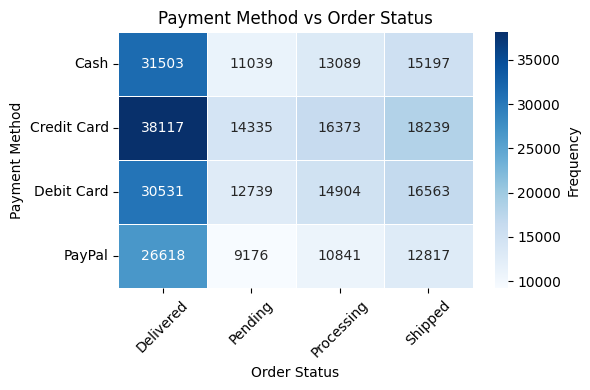

In [52]:
plt.figure(figsize=(6, 4))

# Plot heatmap of contingency table with annotations and customized styling
sns.heatmap(contingency, annot=True, cmap="Blues", fmt="d", linewidths=0.5, cbar_kws={'label': 'Frequency'}, annot_kws={"size": 10})

plt.title('Payment Method vs Order Status')
plt.xlabel('Order Status')
plt.ylabel('Payment Method')

plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

###Exploratory Data Analysis and Correlation

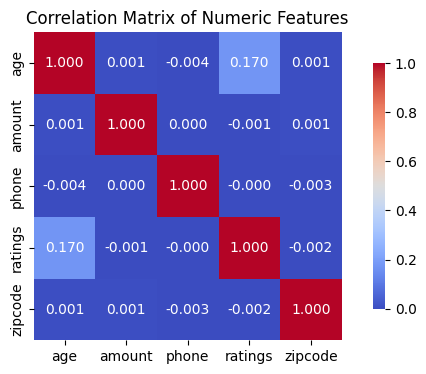

In [53]:
# Calculate the correlation matrix
# Select numeric features excluding ID columns
numeric_features_excluded_ids = data.select_dtypes(include=['int64', 'float64']).columns.difference(['new_customer_id', 'new_transaction_id'])

correlation_matrix = data[numeric_features_excluded_ids].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numeric Features')
plt.show()

Numeric feature means by Order_Status:
                    age      amount   ratings
order_status                                 
Delivered     32.185266  254.826863  3.159187
Pending       36.835353  255.744201  3.054347
Processing    38.071277  254.750612  3.250059
Shipped       38.493791  255.853581  3.185144

Frequency counts for city by Order_Status:
order_status    Delivered  Pending  Processing  Shipped
city                                                   
Adelaide              824      364         422      550
Albuquerque           329      137         203      199
Albury-Wodonga        876      363         419      540
Arlington             321      106         180      218
Atlanta               315      142         192      204
...                   ...      ...         ...      ...
Wichita               367      113         178      181
Windsor               832      322         454      507
Winnipeg              948      386         471      530
Wollongong            877

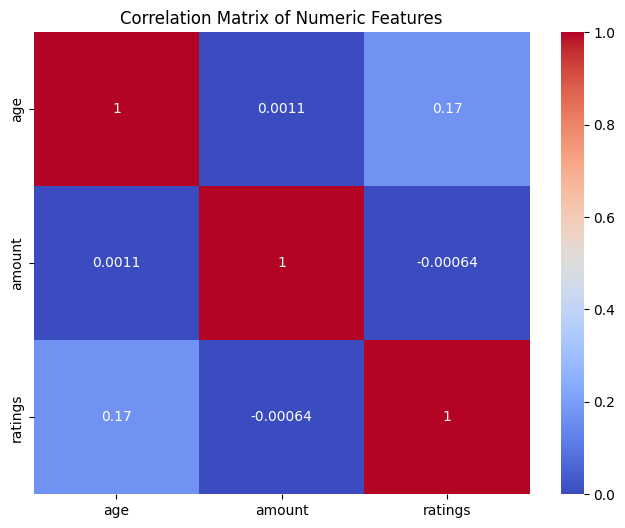

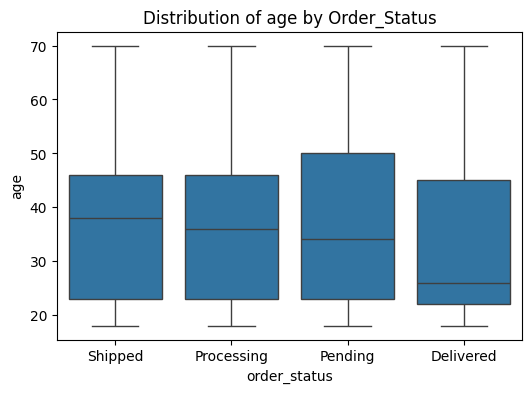

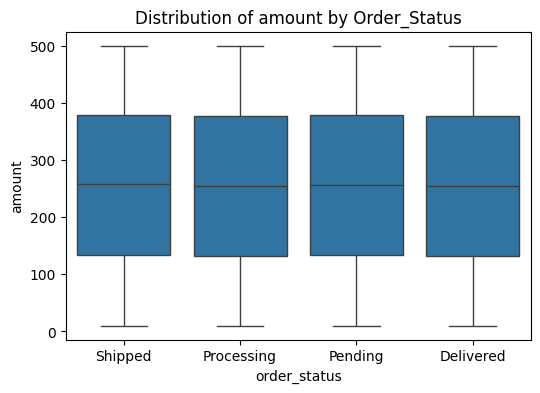

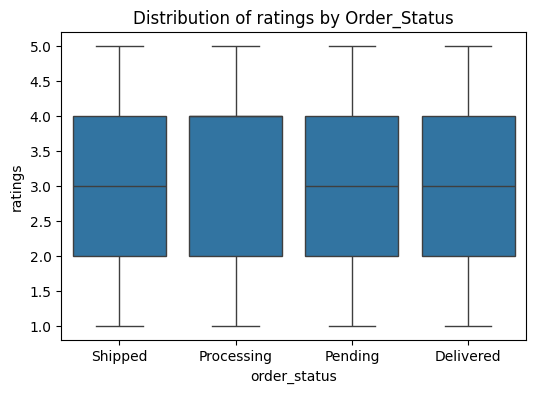

In [54]:
# Exclude non-relevant columns from features
columns = data.columns.difference(['name', 'email', 'phone', 'address', 'zipcode',
                                   'order_status', 'products', 'new_customer_id',
                                   'new_transaction_id', 'datetime', 'product_brand'])

X = data[columns]
y = data['order_status']

# separate numeric and categorical features
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Show basic statistics of numeric features grouped by target classes
print("Numeric feature means by Order_Status:")
print(data.groupby('order_status')[numeric_cols].mean())

# Show frequency counts for categorical variables grouped by target
for cat_col in categorical_cols:
    print(f"\nFrequency counts for {cat_col} by Order_Status:")
    print(pd.crosstab(data[cat_col], y))

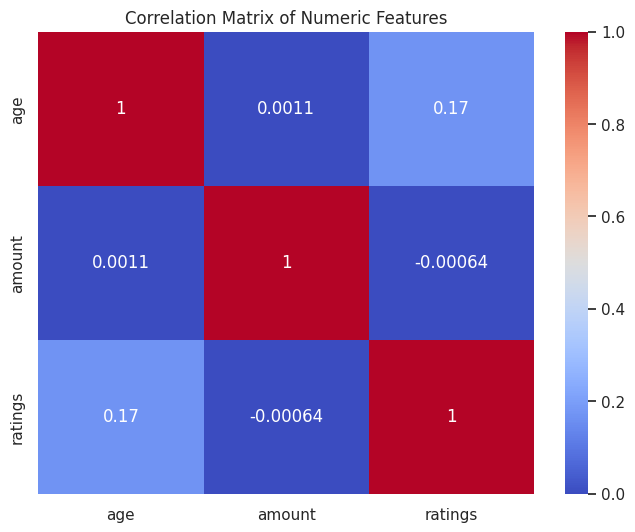

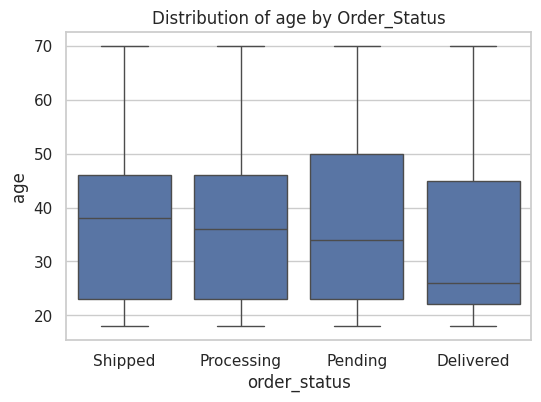

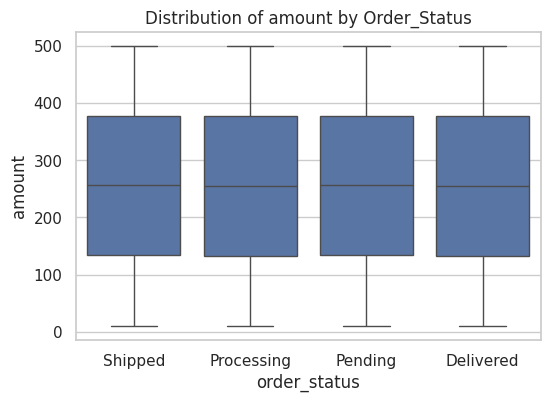

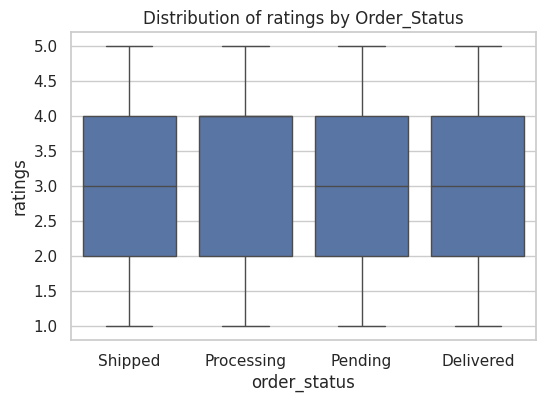

In [78]:
# Visualize correlations among numeric features
plt.figure(figsize=(8, 6))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Boxplots to visualize numeric feature distributions by target class
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=y, y=data[col])
    plt.title(f'Distribution of {col} by Order_Status')
    plt.show()

###Demographic Analysis

In [55]:
# Filter delivered orders
delivered_orders = data[data['order_status'] == 'Delivered'].copy()

# Define age bins and labels
bins = [18, 25, 35, 45, 100]
labels = ['18-25', '25-35', '35-45', '46+']

# Create age group column
delivered_orders['Age_Group'] = pd.cut(delivered_orders['age'], bins=bins, labels=labels, right=False)

# Group by age group
summary = delivered_orders.groupby('Age_Group').agg(
    Total_Amount_Millions=('amount', lambda x: x.sum() / 1_000_000),
    Total_Purchases_K=('amount', lambda x: len(x) / 1_000)
).reset_index()

summary = summary.sort_values(by='Total_Amount_Millions', ascending=False)
summary

,Age_Group,Total_Amount_Millions,Total_Purchases_K
0,18-25,13.885038,54.442
1,25-35,8.300571,32.657
3,46+,8.141918,31.929
2,35-45,1.976620,7.741


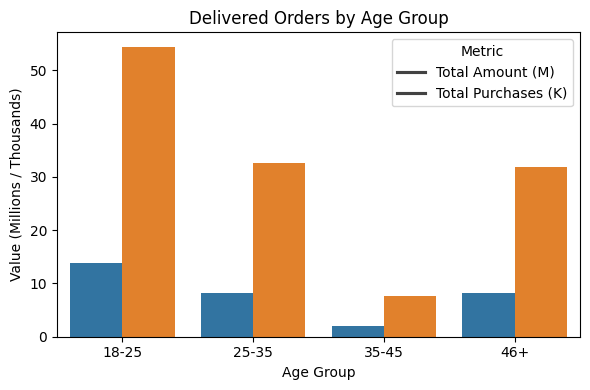

In [56]:
# Plot side-by-side bars for amount and purchases
plt.figure(figsize=(6, 4))
sns.barplot(data=summary.melt(id_vars='Age_Group',
                                        value_vars=['Total_Amount_Millions', 'Total_Purchases_K']),
            x='Age_Group', y='value', hue='variable')

plt.title('Delivered Orders by Age Group')
plt.ylabel('Value (Millions / Thousands)')
plt.xlabel('Age Group')
plt.legend(title='Metric', labels=['Total Amount (M)', 'Total Purchases (K)'])
plt.tight_layout()
plt.show()

In [57]:
# Filter for delivered orders
delivered_orders = data[data['order_status'] == 'Delivered'].copy()

# Group by City: total amount (in millions) and total purchases (in thousands)
city_summary = delivered_orders.groupby('city').agg(
    Total_Amount_Millions=('amount', lambda x: x.sum() / 1_000_000),
    Total_Purchases_K=('amount', lambda x: len(x) / 1_000)
).reset_index()

# Sort by revenue
city_summary = city_summary.sort_values(by='Total_Amount_Millions', ascending=False).head(10)  # Top 10 cities
city_summary

,city,Total_Amount_Millions,Total_Purchases_K
100,Portsmouth,2.929678,11.516
107,San Francisco,2.503368,9.807
44,Frankfurt,2.191669,8.609
26,Chicago,1.356801,5.358
43,Fort Worth,1.148822,4.540
16,Boston,0.593256,2.328
67,London,0.418267,1.686
84,New York,0.372657,1.456
32,Darwin,0.243578,0.942
122,Victoria,0.238930,0.940


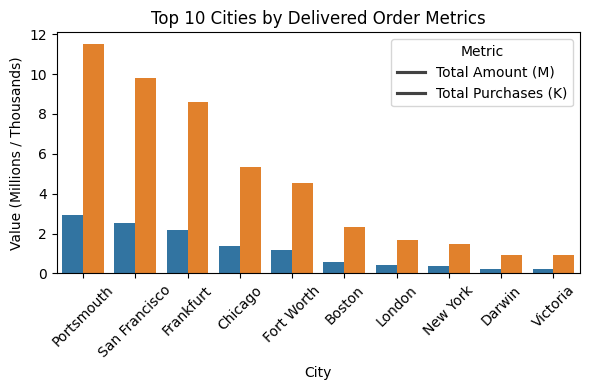

In [58]:
# Melt for grouped bar plot
melted_city = city_summary.melt(id_vars='city', value_vars=['Total_Amount_Millions', 'Total_Purchases_K'],
                                var_name='Metric', value_name='Value')

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=melted_city, x='city', y='Value', hue='Metric')

plt.title('Top 10 Cities by Delivered Order Metrics')
plt.ylabel('Value (Millions / Thousands)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.legend(title='Metric', labels=['Total Amount (M)', 'Total Purchases (K)'])
plt.tight_layout()
plt.show()

In [59]:
# Filter for delivered orders
delivered_orders = data[data['order_status'] == 'Delivered'].copy()

# Group by State
state_summary = delivered_orders.groupby('state').agg(Total_Revenue=('amount', 'sum'),Total_Orders=('amount', 'count')).reset_index()

# Convert revenue to millions
state_summary['Revenue_Millions'] = state_summary['Total_Revenue'] / 1_000_000

# Sort by revenue
state_summary_sorted = state_summary.sort_values(by='Revenue_Millions', ascending=False)

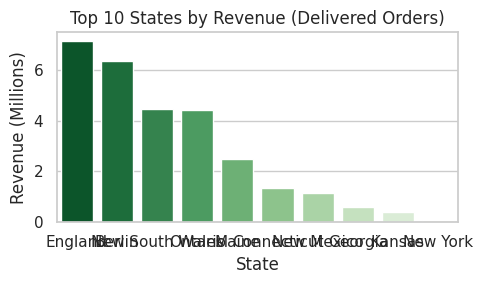

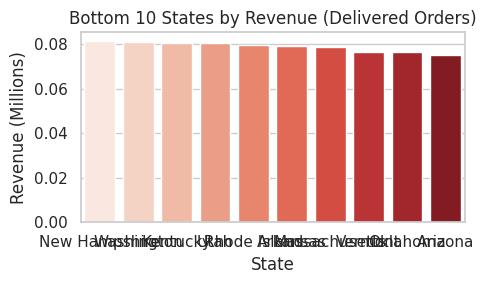

In [60]:
# Top 10 states
top_states = state_summary_sorted.head(10)

# Bottom 10 states
bottom_states = state_summary_sorted.tail(10)

# Set style
sns.set(style="whitegrid")

# Plot Top 10
plt.figure(figsize=(5, 3))
sns.barplot(data=top_states, x='state', y='Revenue_Millions', palette='Greens_r')
plt.title('Top 10 States by Revenue (Delivered Orders)')
plt.ylabel('Revenue (Millions)')
plt.xlabel('State')
plt.tight_layout()
plt.show()

# Plot Bottom 10
plt.figure(figsize=(5, 3))
sns.barplot(data=bottom_states, x='state', y='Revenue_Millions', palette='Reds')
plt.title('Bottom 10 States by Revenue (Delivered Orders)')
plt.ylabel('Revenue (Millions)')
plt.xlabel('State')
plt.tight_layout()
plt.show()

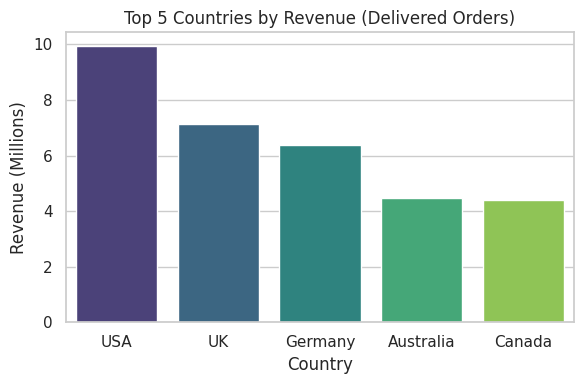

In [61]:
# Filter delivered orders and aggregate by Country
country_summary = (
    data[data['order_status'] == 'Delivered'].groupby('country')['amount'].agg(Total_Revenue='sum', Total_Orders='count').reset_index()
)

# Convert revenue to millions and sort by revenue
country_summary['Revenue_Millions'] = country_summary['Total_Revenue'] / 1_000_000
country_summary = country_summary.sort_values('Revenue_Millions', ascending=False)

# Plot Top 5 countries by revenue
plt.figure(figsize=(6, 4))
sns.barplot(data=country_summary.head(5), x='country', y='Revenue_Millions', palette='viridis')
plt.title('Top 5 Countries by Revenue (Delivered Orders)')
plt.ylabel('Revenue (Millions)')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

In [62]:
# Create the treemap
fig = px.treemap(
    data,
    path=['country', 'state', 'city'],
    values='amount',
    title='Sales Amount Treemap'
)
fig

In [63]:
# Group delivered orders by Customer Segment
segment_summary = (
    delivered_orders.groupby('customer_segment')
    .agg(Total_Amount=('amount', 'sum'), Total_Purchases=('customer_segment', 'count'))
    .reset_index()
)

# Convert units for readability
segment_summary['Total_Amount_Millions'] = segment_summary['Total_Amount'] / 1_000_000
segment_summary['Total_Purchases_K'] = segment_summary['Total_Purchases'] / 1_000

# Sort by Total Amount in descending order
segment_summary_sorted = segment_summary.sort_values(by='Total_Amount_Millions', ascending=False).round(2)
segment_summary_sorted

,customer_segment,Total_Amount,Total_Purchases,Total_Amount_Millions,Total_Purchases_K
2,Regular,18938411.01,74319,18.94,74.32
0,New,8075853.04,31715,8.08,31.72
1,Premium,5289882.57,20735,5.29,20.74


In [64]:
income_summary = (
    delivered_orders.groupby('income')
    .agg(Total_Amount=('amount', 'sum'), Total_Purchases=('income', 'count'))
    .reset_index()
)

income_summary['Total_Amount_Millions'] = income_summary['Total_Amount'] / 1_000_000
income_summary['Total_Purchases_K'] = income_summary['Total_Purchases'] / 1_000

income_summary_sorted = income_summary.sort_values(by='Total_Amount_Millions', ascending=False).round(2)
income_summary_sorted

,income,Total_Amount,Total_Purchases,Total_Amount_Millions,Total_Purchases_K
2,Medium,14322824.19,56347,14.32,56.35
1,Low,9219837.82,36050,9.22,36.05
0,High,8761484.60,34372,8.76,34.37


###Customer Purchase Analysis

In [65]:
# Group delivered orders by customer and aggregate product categories into a list
customer_products = (
    delivered_orders.groupby('new_customer_id')['product_category'].apply(list).to_frame('products')
)

# Group delivered orders by customer and aggregate product categories into a list
customer_products['number_of_products'] = customer_products['products'].str.len()

# Sort customers by number of products in descending order
customer_products = customer_products.sort_values('number_of_products', ascending=False)
customer_products

,products,number_of_products
new_customer_id,,
20730,"[Grocery, Clothing, Books, Grocery, Grocery, G...",14
16594,"[Books, Clothing, Books, Electronics, Grocery,...",10
24093,"[Home Decor, Clothing, Electronics, Electronic...",10
17607,"[Books, Clothing, Home Decor, Books, Home Deco...",10
37996,"[Books, Home Decor, Books, Books, Grocery, Boo...",10
...,...,...
54264,[Electronics],1
54263,[Grocery],1
54260,[Grocery],1


In [66]:
# Initialize TransactionEncoder to transform product lists into one-hot encoded format
te = TransactionEncoder()

# Apply the encoder to the list of products per customer and convert to a DataFrame
basket = pd.DataFrame(te.fit_transform(customer_products['products']),
                         columns=te.columns_, index=customer_products.index)
basket

,Books,Clothing,Electronics,Grocery,Home Decor
new_customer_id,,,,,
20730,True,True,True,True,True
16594,True,True,True,True,True
24093,False,True,True,True,True
17607,True,True,False,True,True
37996,True,True,True,True,True
...,...,...,...,...,...
54264,False,False,True,False,False
54263,False,False,False,True,False
54260,False,False,False,True,False


In [67]:
# Use Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.0006, use_colnames=True)

# Sort the frequent itemsets by 'support' in descending order
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

frequent_itemsets

,support,itemsets
2,0.312515,(Electronics)
3,0.201748,(Grocery)
1,0.185243,(Clothing)
0,0.184097,(Books)
4,0.183168,(Home Decor)
12,0.010668,"(Electronics, Grocery)"
9,0.009884,"(Electronics, Clothing)"
13,0.009807,"(Electronics, Home Decor)"
6,0.009436,"(Electronics, Books)"
10,0.006673,"(Clothing, Grocery)"


In [68]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules = rules.sort_values(by='confidence', ascending=False)[['antecedents','consequents','antecedent support'
                                                             ,'consequent support','support','confidence','lift']]
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
14,"(Clothing, Home Decor)",(Electronics),0.005855,0.312515,0.001429,0.244118,0.781140
2,"(Home Decor, Grocery)",(Electronics),0.006638,0.312515,0.001610,0.242542,0.776099
5,"(Grocery, Books)",(Electronics),0.006647,0.312515,0.001610,0.242228,0.775093
17,"(Home Decor, Books)",(Electronics),0.005984,0.312515,0.001421,0.237410,0.759677
8,"(Clothing, Grocery)",(Electronics),0.006673,0.312515,0.001567,0.234839,0.751449
11,"(Clothing, Books)",(Electronics),0.006397,0.312515,0.001438,0.224764,0.719213
22,"(Home Decor, Books)",(Grocery),0.005984,0.201748,0.001093,0.182734,0.905754
19,"(Clothing, Books)",(Grocery),0.006397,0.201748,0.001119,0.174966,0.867253
4,"(Electronics, Books)",(Grocery),0.009436,0.201748,0.001610,0.170620,0.845711
24,"(Clothing, Home Decor)",(Books),0.005855,0.184097,0.000990,0.169118,0.918631


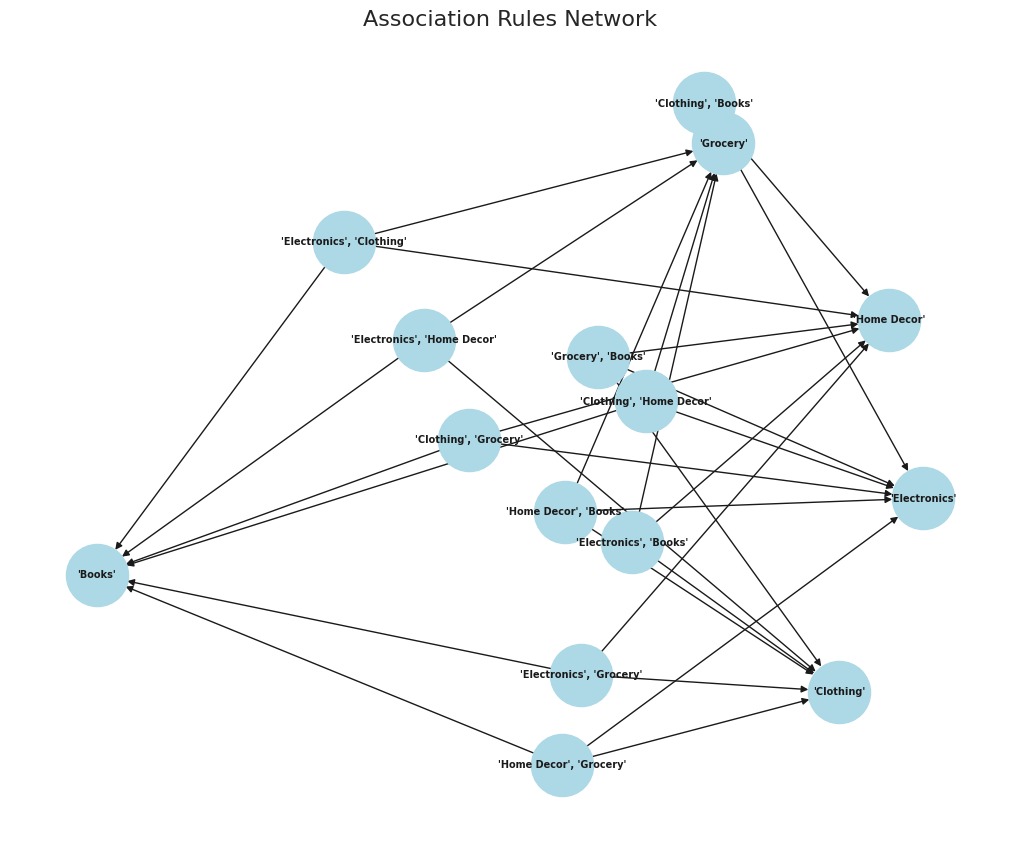

In [69]:
# Create the directed graph
G = nx.DiGraph()

# Add edges to the graph, converting frozensets to strings without the prefix
for _, row in rules.iterrows():
    antecedent = str(row['antecedents']).replace("frozenset({", "").replace("})", "")
    consequent = str(row['consequents']).replace("frozenset({", "").replace("})", "")
    G.add_edge(antecedent, consequent, weight=row['confidence'])

# Get positions for the nodes using spring layout
pos = nx.spring_layout(G, k=0.7, iterations=50)  # Adjust k for spacing

# Draw the graph with adjusted parameters
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=7, font_weight='bold', arrows=True)

plt.title("Association Rules Network", fontsize=16)
plt.axis('off')  # Hide axes
plt.show()

In [70]:
time_series_data = delivered_orders[['datetime', 'amount']]

time_series_data.set_index('datetime', inplace=True)

time_series_data = time_series_data.sort_index()

# Resample data to daily frequency, summing 'amount' per day, and convert to thousands
daily_sales = time_series_data.resample('D').sum() / 1000
daily_sales

,amount
datetime,
2023-03-01,92.065279
2023-03-02,85.896687
2023-03-03,82.736854
2023-03-04,83.556241
2023-03-05,89.906414
...,...
2024-02-25,88.621691
2024-02-26,92.024605
2024-02-27,95.676398


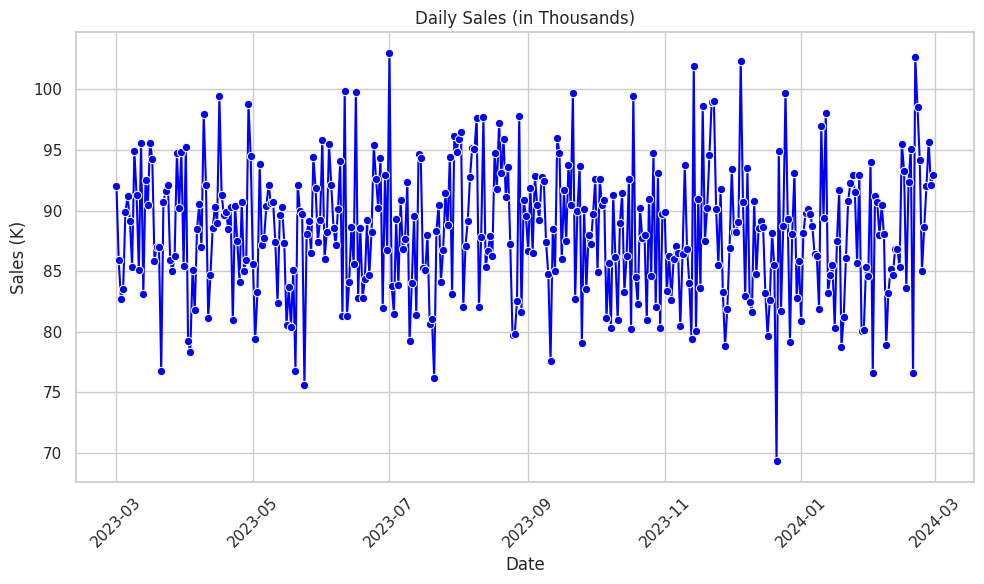

In [71]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_sales, x='datetime', y='amount', marker='o', color='blue')

# Update layout for better readability
plt.title('Daily Sales (in Thousands)')
plt.xlabel('Date')
plt.ylabel('Sales (K)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

###Customer Sentiment Analysis

In [72]:
delivered_orders[['ratings']].head()

,ratings
8,1
9,4
12,1
13,4
28,5


count    126769.000000
mean          3.159187
std           1.305316
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: ratings, dtype: float64


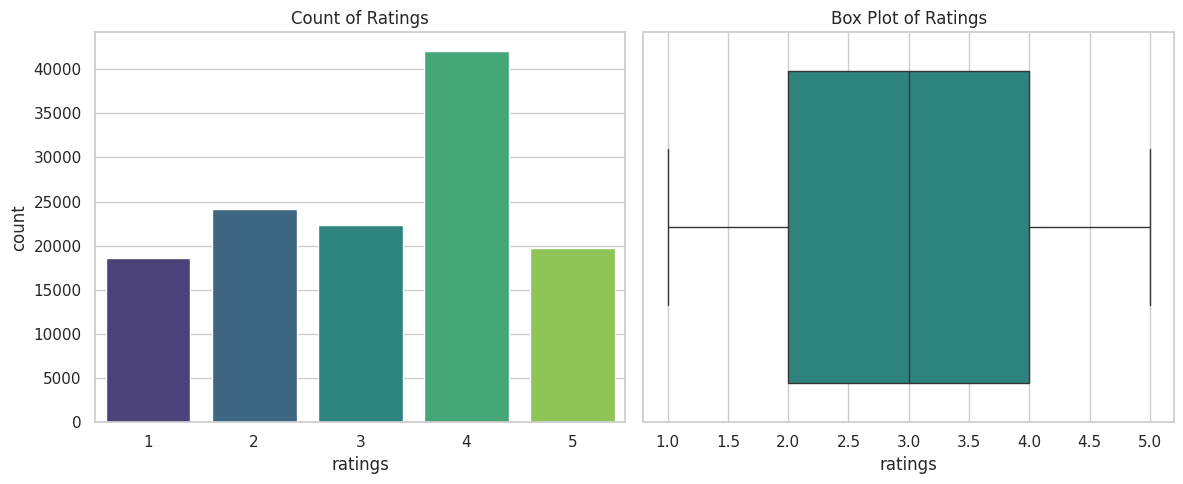

In [73]:
# Descriptive stats and visualizations for Ratings
print(delivered_orders['ratings'].describe())

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='ratings', data=delivered_orders, palette='viridis')
plt.title('Count of Ratings')

plt.subplot(1, 2, 2)
sns.boxplot(x='ratings', data=delivered_orders, palette='viridis')
plt.title('Box Plot of Ratings')

plt.tight_layout()
plt.show()

In [74]:
exclude = ['name', 'address', 'age', 'amount', 'date', 'datetime', 'email',
           'feedback', 'frequency', 'monetary', 'month', 'phone',
           'recency', 'segment', 'year', 'zipcode', 'ratings']

columns_to_analyze = delivered_orders.columns.difference(exclude)

# Analyze mean ratings per category
for col in columns_to_analyze:
    summary = delivered_orders.groupby(col)['ratings'].agg(['mean', 'count']).reset_index()
    filtered = summary[(summary['mean'] < 2.8) | (summary['mean'] > 4)]
    filtered = filtered[filtered['count'] >= 5]

    if not filtered.empty:
        print(f"\nAnalysis for {col}:")
        print(filtered.rename(columns={'mean': 'Mean_Rating', 'count': 'Total_Transactions'}))


Analysis for city:
              city  Mean_Rating  Total_Transactions
16          Boston     2.770189                2328
43      Fort Worth     2.773789                4540
100     Portsmouth     2.791681               11516
107  San Francisco     2.609972                9807

Analysis for new_customer_id:
       new_customer_id  Mean_Rating  Total_Transactions
246                684     2.714286                   7
247                686     2.600000                   5
275                764     2.200000                   5
453               1252     2.666667                   6
586               1643     2.600000                   5
1019              2817     2.777778                   9
1624              4560     2.600000                   5
4744             10433     2.600000                   5
4745             10434     4.200000                   5
8849             14538     2.400000                   5
10905            16594     2.500000                  10
11291            

In [75]:
# Group by new_customer_id and calculate mean rating and total transactions
customer_feedback = delivered_orders.groupby('new_customer_id').agg(
    Mean_Rating=('ratings', 'mean'),
    Total_Transactions=('ratings', 'count')
).reset_index()

# Filter to include only customers with enough ratings
customer_feedback = customer_feedback[customer_feedback['Total_Transactions'] >= 5]

# Define satisfaction thresholds
satisfied_threshold = 4
not_satisfied_threshold = 3

# Create Satisfaction_Status column
customer_feedback['Satisfaction_Status'] = customer_feedback['Mean_Rating'].apply(
    lambda x: 'Satisfied' if x > satisfied_threshold else (
        'Not Satisfied' if x < not_satisfied_threshold else 'Neutral')
)

# Split into separate DataFrames
satisfied_customers = customer_feedback[customer_feedback['Satisfaction_Status'] == 'Satisfied']
not_satisfied_customers = customer_feedback[customer_feedback['Satisfaction_Status'] == 'Not Satisfied']

print("Satisfied customers:", len(satisfied_customers))
print("Not satisfied customers:", len(not_satisfied_customers))


Satisfied customers: 4
Not satisfied customers: 74


In [76]:
satisfied_customers

,new_customer_id,Mean_Rating,Total_Transactions,Satisfaction_Status
4745,10434,4.200000,5,Satisfied
28092,33781,4.200000,5,Satisfied
37612,43301,4.285714,7,Satisfied
50759,84274,4.200000,5,Satisfied


In [77]:
not_satisfied_customers

,new_customer_id,Mean_Rating,Total_Transactions,Satisfaction_Status
246,684,2.714286,7,Not Satisfied
247,686,2.600000,5,Not Satisfied
275,764,2.200000,5,Not Satisfied
453,1252,2.666667,6,Not Satisfied
586,1643,2.600000,5,Not Satisfied
...,...,...,...,...
48281,75966,2.200000,5,Not Satisfied
48980,78110,2.800000,5,Not Satisfied
49750,80363,1.800000,5,Not Satisfied
49955,81072,2.200000,5,Not Satisfied
